### OpenAI Intro

In [1]:
import gym
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

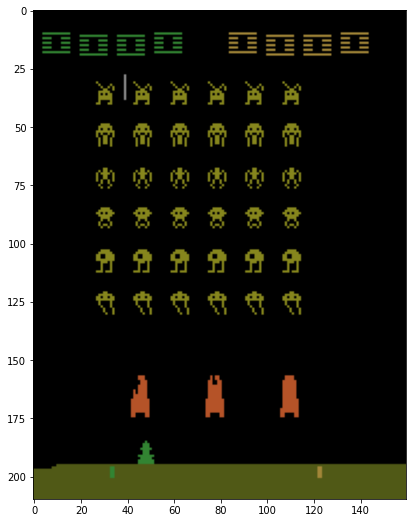

In [3]:
env = gym.make('SpaceInvaders-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()

### CartPole

In [4]:
import numpy as np

In [5]:
env = gym.make('CartPole-v0')

In [6]:
env.reset()

array([-0.01337216, -0.02778526, -0.01816343, -0.04474896])

In [7]:
env.action_space

Discrete(2)

In [8]:
env.action_space.sample()

1

In [9]:
env.step(0)

(array([-0.01392787, -0.22264211, -0.01905841,  0.24214835]), 1.0, False, {})

In [10]:
env.step(1)

(array([-0.01838071, -0.02725318, -0.01421544, -0.05648465]), 1.0, False, {})

In [16]:
env.reset()
total_reward = 0
for i in range(1000):
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    total_reward += reward
    if done:
        print(f'Failed after {i+1} iterations')
        break

Failed after 27 iterations


In [17]:
total_reward

27.0

In [18]:
rounds = []
rewards = []
for _ in range(100):
    env.reset()
    total_reward = 0
    for i in range(1000):
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            rounds.append(i)
            break

Text(0, 0.5, 'Reward')

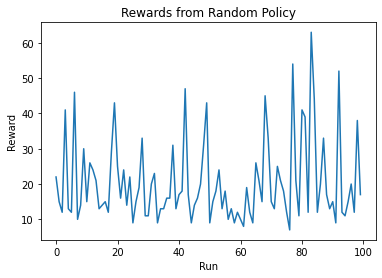

In [21]:
plt.plot(rounds)
plt.title('Rewards from Random Policy')
plt.xlabel('Run')
plt.ylabel('Reward')

### Advertisement Click Example

In [22]:
import numpy as np
import pandas as pd
import random

In [25]:
df = pd.DataFrame(np.random.choice(np.arange(0,2), p = [0.9, 0.1], size = (10000, 5)))

In [26]:
df.head()

,0,1,2,3,4
0,1,0,0,0,1
1,0,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,0,1


In [27]:
total = df.sum()

In [28]:
total.idxmax()

2

### Random Policy

In [29]:
total_views = 10000
num_ads = 5
ad_list = []
total = 0

for view in range(total_views):
    ad = np.random.randint(low = 0, high = 5)
    ad_list.append(ad)
    reward = df.iloc[view, ad]
    total += reward

In [30]:
total

998

In [31]:
np.unique(ad_list, return_counts=True)[1]/len(ad_list)

array([0.2056, 0.2009, 0.1998, 0.1905, 0.2032])